# Problem
For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Scoping
## Pre-EDA
The idea is to run an analysis of the endagered data in the parl. This could befrom a large host of animal data so the seperation of endangered vs common animals. It will be worth looking at other animal parameters to maybe see why they are endangered. I have not seen the data so I can come back to this.

## Post EDA

# Loading the data
There are 2 CSV files so both need to be loaded and potentially merged if there is a common feature.
- species_info.csv - contains data about different species and their conservation status
- observations.csv - holds recorded sightings of different species at several national parks for the **past 7 days**.

In [4]:
df_obvs = pd.read_csv('observations.csv')
df_spec = pd.read_csv('species_info.csv')

# EDA
Process is to look at the head of the data, any anomalies in the data types, any missing values.  
Then to look at the headings and what that data actually represents.

## Observations EDA
Data are objects and ints, and there are no null values and 23296 values.

In [5]:
df_obvs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
df_obvs.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [33]:
df_obvs['park_name'] = df_obvs['park_name'].astype('category')

In [34]:
df_obvs.dtypes

scientific_name      object
park_name          category
observations          int64
dtype: object

In [10]:
df_obvs.isnull().any()

scientific_name    False
park_name          False
observations       False
dtype: bool

In [35]:
df_obvs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Bryce National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


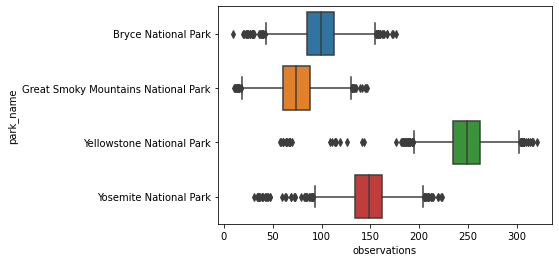

In [39]:
sns.boxplot(x=df_obvs['observations'], y=df_obvs['park_name'])
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

### Findings
IT is clear to see that there are many more observations of species in Yellowstone than other National Parks.

## Species EDA
From this data the species name and the conservation status are going to be important here. 
### Conservation status
There are 4 different status, with an addition of 'NaN', which are 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'. Obviously the key here is 'Endangered'
### Scientific name
This is also key as it means I can merge the data sets based on this column/attribute.  
There are different numbers of scientific names Vs common names 5541 vs 5504.

In [11]:
df_spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [15]:
df_spec.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [16]:
df_spec.isnull().any()

category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

In [18]:
df_spec.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [23]:
df_spec['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [25]:
sns.boxplot(df_spec, x='conservation_status', y='scientific_name')

C:\Users\mploc\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret input 'scientific_name'